In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os, string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import Word

import snowballstemmer
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
import re
import time

In [4]:
cd C:\Users\ACER\Documents\project\csv

C:\Users\ACER\Documents\project\csv


In [5]:
my_df = pd.read_csv("clean_tweetstextblobbinary.csv")

In [6]:
my_df['Sentiment'].value_counts()

positive    1499
negative     616
Name: Sentiment, dtype: int64

In [7]:
df = my_df[['Content', 'Sentiment']].copy()

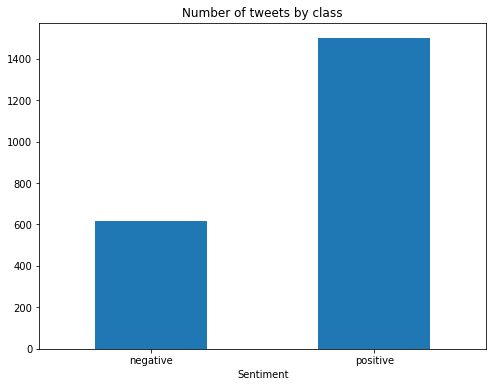

In [8]:
df.groupby(['Sentiment']).count().plot(kind='bar', figsize=(8, 6), rot=0, legend=False, title='Number of tweets by class');

# removing stop words

In [9]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))
cleaned_tweets = []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Content.split() if not word in stopwords_set]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))

df['Content'] = cleaned_tweets

# Tokenization and lemmatization:

In [10]:
from nltk.stem import WordNetLemmatizer
# Tokenization
tokenized_tweet = df['Content'].apply(lambda x: x.split())
# Finding Lemma for each word
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
#joining words into sentences (from where they came from)
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

df['Content'] = tokenized_tweet

# Feature Extraction

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(df['Content'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(df['Content'])

In [12]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['Sentiment'])

In [13]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
#Train, test splitting
#X_train, X_test, y_train, y_test = train_test_split(df['Content'].values, df['target'].values, test_size=0.20, random_state=600)


In [14]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = BernoulliNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())
    
    # calculating f1 score
    print(f'F1 Score - {f1_score(y_test, predictions)}')
    print(f'Accuracy score- {metrics.accuracy_score(y_test, predictions)}')
    print(classification_report(y_test, predictions))
    print(f'confusion_matrix-{confusion_matrix(y_test,predictions)}')

In [15]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, df['target'], test_size=0.33, random_state=150)
naive_model(X_train, X_test, y_train, y_test)

F1 Score - 0.8404802744425386
Accuracy score- 0.7335243553008596
              precision    recall  f1-score   support

           0       0.67      0.11      0.19       197
           1       0.74      0.98      0.84       501

   micro avg       0.73      0.73      0.73       698
   macro avg       0.70      0.54      0.52       698
weighted avg       0.72      0.73      0.66       698

confusion_matrix-[[ 22 175]
 [ 11 490]]
Wall time: 8.71 s


In [16]:
%%time
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, df['target'], test_size=0.33, random_state=150)
naive_model(X_train, X_test, y_train, y_test)

F1 Score - 0.8404802744425386
Accuracy score- 0.7335243553008596
              precision    recall  f1-score   support

           0       0.67      0.11      0.19       197
           1       0.74      0.98      0.84       501

   micro avg       0.73      0.73      0.73       698
   macro avg       0.70      0.54      0.52       698
weighted avg       0.72      0.73      0.66       698

confusion_matrix-[[ 22 175]
 [ 11 490]]
Wall time: 799 ms


In [18]:
def logicistregression(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = lr.predict(X_test.toarray())
    
    # calculating f1 score
    print(f'F1 Score - {f1_score(y_test, predictions)}')
    print(f'Accuracy score- {metrics.accuracy_score(y_test, predictions)}')
    print(classification_report(y_test, predictions))
    print(f'confusion_matrix-{confusion_matrix(y_test,predictions)}')
   

In [19]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, df['target'], test_size=0.33, random_state=150)
logicistregression(X_train, X_test, y_train, y_test)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 Score - 0.8537477148080438
Accuracy score- 0.7707736389684814
              precision    recall  f1-score   support

           0       0.68      0.36      0.47       197
           1       0.79      0.93      0.85       501

   micro avg       0.77      0.77      0.77       698
   macro avg       0.73      0.65      0.66       698
weighted avg       0.76      0.77      0.75       698

confusion_matrix-[[ 71 126]
 [ 34 467]]
Wall time: 1.07 s


In [20]:
%%time
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, df['target'], test_size=0.33, random_state=150)
logicistregression(X_train, X_test, y_train, y_test)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 Score - 0.8412162162162162
Accuracy score- 0.7306590257879656
              precision    recall  f1-score   support

           0       0.80      0.06      0.11       197
           1       0.73      0.99      0.84       501

   micro avg       0.73      0.73      0.73       698
   macro avg       0.76      0.53      0.48       698
weighted avg       0.75      0.73      0.64       698

confusion_matrix-[[ 12 185]
 [  3 498]]
Wall time: 222 ms


In [21]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

In [23]:
def supportvector(X_train, X_test, y_train, y_test):
    
    clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='rbf'))
    clf.fit(X_train.toarray(), y_train)

    # predictions over test set
    
    predictions = clf.predict(X_test.toarray())
    
    # calculating f1 score
    print(f'F1 Score - {f1_score(y_test, predictions)}')
    print(f'Accuracy score- {metrics.accuracy_score(y_test, predictions)}')
    print(classification_report(y_test, predictions))
    print(f'confusion_matrix-{confusion_matrix(y_test,predictions)}')
   

In [24]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, df['target'], test_size=0.33, random_state=150)
supportvector(X_train, X_test, y_train, y_test)

F1 Score - 0.8388941849380361
Accuracy score- 0.7578796561604585
              precision    recall  f1-score   support

           0       0.59      0.45      0.51       197
           1       0.80      0.88      0.84       501

   micro avg       0.76      0.76      0.76       698
   macro avg       0.70      0.67      0.68       698
weighted avg       0.74      0.76      0.75       698

confusion_matrix-[[ 89 108]
 [ 61 440]]
Wall time: 2min 56s


In [25]:
%%time
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, df['target'], test_size=0.33, random_state=150)
supportvector(X_train, X_test, y_train, y_test)

F1 Score - 0.842911877394636
Accuracy score- 0.7650429799426934
              precision    recall  f1-score   support

           0       0.61      0.48      0.53       197
           1       0.81      0.88      0.84       501

   micro avg       0.77      0.77      0.77       698
   macro avg       0.71      0.68      0.69       698
weighted avg       0.75      0.77      0.76       698

confusion_matrix-[[ 94 103]
 [ 61 440]]
Wall time: 2min 55s


In [26]:
#using KNN
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:
def kneigbors(X_train, X_test, y_train, y_test):
    #trying to determine the best knearest neighbor
    for i in range(1,51):
        knn=KNeighborsClassifier(n_neighbors = i)
        knnModel = knn.fit(X_train.toarray(),y_train)
        knnPredict =knnModel.predict(X_test.toarray())
        w = f1_score(y_test, knnPredict)
        x = metrics.accuracy_score(y_test, knnPredict)
        b = classification_report(y_test, knnPredict)
        print (i)
        print (w)
        print(x) 
        print (b)
        print(f'confusion_matrix-{confusion_matrix(y_test,knnPredict)}')

In [34]:
%%time
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, df['target'], test_size=0.33, random_state=150)
kneigbors(X_train, X_test, y_train, y_test)

1
0.8403361344537815
0.7277936962750716
              precision    recall  f1-score   support

           0       0.89      0.04      0.08       197
           1       0.73      1.00      0.84       501

   micro avg       0.73      0.73      0.73       698
   macro avg       0.81      0.52      0.46       698
weighted avg       0.77      0.73      0.63       698

confusion_matrix-[[  8 189]
 [  1 500]]
2
0.7822736030828517
0.6762177650429799
              precision    recall  f1-score   support

           0       0.41      0.34      0.37       197
           1       0.76      0.81      0.78       501

   micro avg       0.68      0.68      0.68       698
   macro avg       0.58      0.57      0.58       698
weighted avg       0.66      0.68      0.67       698

confusion_matrix-[[ 66 131]
 [ 95 406]]
3
0.8256721595836948
0.7120343839541547
              precision    recall  f1-score   support

           0       0.46      0.11      0.17       197
           1       0.73      0.95    

22
0.8349016253207869
0.7234957020057307
              precision    recall  f1-score   support

           0       0.57      0.09      0.15       197
           1       0.73      0.97      0.83       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.65      0.53      0.49       698
weighted avg       0.68      0.72      0.64       698

confusion_matrix-[[ 17 180]
 [ 13 488]]
23
0.8381601362862011
0.7277936962750716
              precision    recall  f1-score   support

           0       0.64      0.08      0.14       197
           1       0.73      0.98      0.84       501

   micro avg       0.73      0.73      0.73       698
   macro avg       0.69      0.53      0.49       698
weighted avg       0.71      0.73      0.64       698

confusion_matrix-[[ 16 181]
 [  9 492]]
24
0.8349016253207869
0.7234957020057307
              precision    recall  f1-score   support

           0       0.57      0.09      0.15       197
           1       0.73      0.97 

43
0.8414839797639123
0.7306590257879656
              precision    recall  f1-score   support

           0       0.85      0.06      0.10       197
           1       0.73      1.00      0.84       501

   micro avg       0.73      0.73      0.73       698
   macro avg       0.79      0.53      0.47       698
weighted avg       0.76      0.73      0.63       698

confusion_matrix-[[ 11 186]
 [  2 499]]
44
0.8421940928270042
0.7320916905444126
              precision    recall  f1-score   support

           0       0.86      0.06      0.11       197
           1       0.73      1.00      0.84       501

   micro avg       0.73      0.73      0.73       698
   macro avg       0.79      0.53      0.48       698
weighted avg       0.77      0.73      0.64       698

confusion_matrix-[[ 12 185]
 [  2 499]]
45
0.8414839797639123
0.7306590257879656
              precision    recall  f1-score   support

           0       0.85      0.06      0.10       197
           1       0.73      1.00 

In [32]:
%%time
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, df['target'], test_size=0.33, random_state=150)
kneigbors(X_train, X_test, y_train, y_test)

1
0.8299912816041848
0.7206303724928367
              precision    recall  f1-score   support

           0       0.52      0.14      0.22       197
           1       0.74      0.95      0.83       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.63      0.54      0.52       698
weighted avg       0.68      0.72      0.66       698

confusion_matrix-[[ 27 170]
 [ 25 476]]
2
0.8111510791366906
0.6991404011461319
              precision    recall  f1-score   support

           0       0.43      0.19      0.26       197
           1       0.74      0.90      0.81       501

   micro avg       0.70      0.70      0.70       698
   macro avg       0.58      0.54      0.54       698
weighted avg       0.65      0.70      0.66       698

confusion_matrix-[[ 37 160]
 [ 50 451]]
3
0.8307952622673437
0.7134670487106017
              precision    recall  f1-score   support

           0       0.41      0.04      0.07       197
           1       0.72      0.98    

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


20
0.835696413678065
0.7177650429799427
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.72      1.00      0.84       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.36      0.50      0.42       698
weighted avg       0.52      0.72      0.60       698

confusion_matrix-[[  0 197]
 [  0 501]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


21
0.835696413678065
0.7177650429799427
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.72      1.00      0.84       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.36      0.50      0.42       698
weighted avg       0.52      0.72      0.60       698

confusion_matrix-[[  0 197]
 [  0 501]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


22
0.835696413678065
0.7177650429799427
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.72      1.00      0.84       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.36      0.50      0.42       698
weighted avg       0.52      0.72      0.60       698

confusion_matrix-[[  0 197]
 [  0 501]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


23
0.835696413678065
0.7177650429799427
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.72      1.00      0.84       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.36      0.50      0.42       698
weighted avg       0.52      0.72      0.60       698

confusion_matrix-[[  0 197]
 [  0 501]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


24
0.835696413678065
0.7177650429799427
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.72      1.00      0.84       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.36      0.50      0.42       698
weighted avg       0.52      0.72      0.60       698

confusion_matrix-[[  0 197]
 [  0 501]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


25
0.835696413678065
0.7177650429799427
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.72      1.00      0.84       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.36      0.50      0.42       698
weighted avg       0.52      0.72      0.60       698

confusion_matrix-[[  0 197]
 [  0 501]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


26
0.835696413678065
0.7177650429799427
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.72      1.00      0.84       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.36      0.50      0.42       698
weighted avg       0.52      0.72      0.60       698

confusion_matrix-[[  0 197]
 [  0 501]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


27
0.835696413678065
0.7177650429799427
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.72      1.00      0.84       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.36      0.50      0.42       698
weighted avg       0.52      0.72      0.60       698

confusion_matrix-[[  0 197]
 [  0 501]]


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


28
0.835696413678065
0.7177650429799427
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.72      1.00      0.84       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.36      0.50      0.42       698
weighted avg       0.52      0.72      0.60       698

confusion_matrix-[[  0 197]
 [  0 501]]
29
0.835696413678065
0.7177650429799427
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.72      1.00      0.84       501

   micro avg       0.72      0.72      0.72       698
   macro avg       0.36      0.50      0.42       698
weighted avg       0.52      0.72      0.60       698

confusion_matrix-[[  0 197]
 [  0 501]]
Wall time: 11min 55s


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Token Importance

In [154]:
def get_tokens_coefs(vocab, coefs, n):
    coef_df = pd.DataFrame({'vocab': vocab, 'coef':coefs.reshape(-1)})
    return coef_df.sort_values('coef', ascending=False).reset_index(drop=True)[:n]

In [155]:
def plot_tokens_coefs(df, ax, label):
    df.sort_values('coef').plot.barh(legend=False, ax=ax)
    ax.set_yticklabels(df['vocab'].values.tolist()[::-1])
    ax.set_title(label);

In [156]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.set_style(style='white')